# Coursework 1

## IMPORTANT ## - Once you have finished, save your workbook with your student number at the end of the file name, and please save this file as a .html using file -> save and export notebook as -> html

### Please also enter your student number here:

Student number:

## Context

A pharmaceutical company is developing a new tablet formulation for a pain-relief medication. The goal is to analyze different formulations with varying ingredient compositions and determine how they affect dissolution rate, stability, and bioavailability.

Each formulation consists of:

- __Active Ingredient (%)__: The proportion of the active pharmaceutical ingredient (API) in the tablet.
- __Filler (%)__: The proportion of excipients (e.g., lactose, cellulose) used as fillers.
- __Binder (%)__: The proportion of binders (e.g., PVP, starch) to help tablet cohesion.
- __Disintegrant (%)__: The proportion of disintegrants (e.g., croscarmellose) to help tablet dissolution.
- __Lubricant (%)__: The proportion of lubricants (e.g., magnesium stearate) to aid manufacturing.

- You also realise you can bin the Active Ingredient into three categories (__API_group__) - Low (<= 15%), Medium (> 15% and <= 30%), and High (> 30%)

The company is tracking __key formulation outcomes__:

- __DissolutionRate (% dissolved in 30 min)__ – Higher values indicate faster drug release.
- __Stability (% remaining after 6 months at 40°C/75%RH)__ – Higher values indicate better stability.
- __Bioavailability (AUC in plasma, normalized to 100)__ – Measures drug absorption efficiency.

The data is available in an excel file called "drug_formulation_data.xlsx" which is available in the github repository.

# Section 1: Load the dataframe into python using pandas. 

Tasks: 
- Look at the data
- Load the data into python
- Calculate some metrics (mean of columns, std of columns etc.) for the data

Questions:
1. Are there any missing values in the data? How would you recommend handling missing data in the event there is any? (10% of marks)
2. What observations do you make from the metrics you have calculated? (10% of marks)

## <span style="color:red">Answer:</span>

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_excel("drug_formulation_data.xlsx")

# Check for missing values
print("\nMissing Values:\n", df.isna().sum())

# Fill NaN values in DissolutionRate(%) with mean
df["DissolutionRate(%)"].fillna(df["DissolutionRate(%)"].mean(), inplace=True)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Missing Values:
 ActiveIngredient(%)     0
API_Group               0
Filler(%)               0
Binder(%)               0
Disintegrant(%)         0
Lubricant(%)            0
DissolutionRate(%)     15
Stability(%)            0
Bioavailability         0
dtype: int64

Summary Statistics:
        ActiveIngredient(%)   Filler(%)   Binder(%)  Disintegrant(%)  \
count           150.000000  150.000000  150.000000       150.000000   
mean             21.551050   64.275316    7.869275         4.123656   
std              10.378577    9.124938    3.647531         1.994349   
min               5.193274   45.915450    2.227718         1.177943   
25%              12.517345   57.451806    5.237622         2.597435   
50%              20.683893   63.498542    7.544822         3.835710   
75%              31.238164   71.382558   10.296222         5.221806   
max              39.541043   85.361040   19.072358        10.993200   

       Lubricant(%)  DissolutionRate(%)  Stability(%)  Bioavailability  


In [2]:
## Dropping NaN values
df_clean =  df.dropna()

## <span style="color:red">Text Answers:</span>

Question 1: There are 15 missing values in the DissolutionRate(%) column - as this is one of the key metrics we are looking to study, the best option is to remove the samples with missing values from the data before proceeding.

Question 2: We can see that the mean of the filler is a lot higher than other components of the formualtions with a mean of 64% (Active Ingredient has a mean of 21%). The output metrics have a fairly small range (std ~10%) and have minimum values of 50%. Dissolution rate has a max value higher than 100%. This could be an error in the measurements or the normalisation.

## Section 2: Plotting the data

Tasks: 
- Create histograms of DissolutionRate, Stability, and Bioavailability
- Create a scatter plot of:
    - ActiveIngredient(%) vs. DissolutionRate(%)
    - ActiveIngredient(%) vs. Bioavialability(%)
- Create a box plot for the stability of the different groups of API amount (low, medium, and high)

Questions:

3. What do the distributions of the dissolution rate, stability, and bioavailability show? What is the implication of this on further analysis like statistics? (10% of marks)
4. How does the amount of Active Ingredient change the formulations? What does this tell you about the formulations? (10% of marks)

## <span style="color:red">Answers:</span>


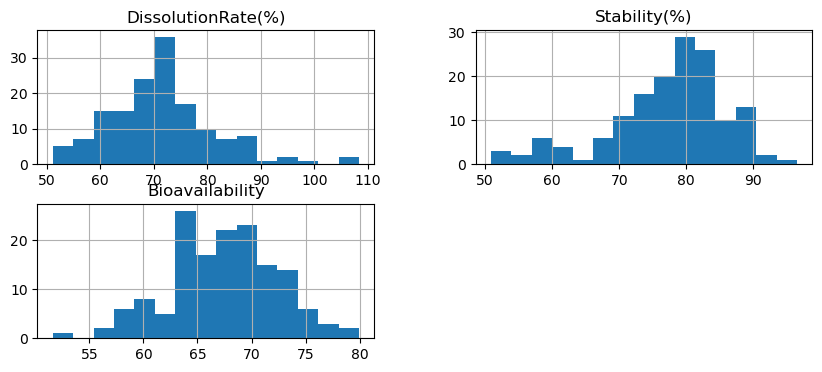

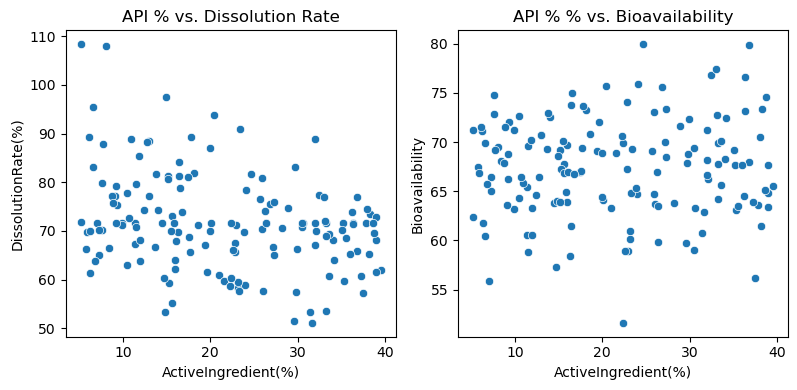

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms
df_clean.hist(["DissolutionRate(%)", "Stability(%)", "Bioavailability"], bins=15, figsize=(10, 4))
plt.show()

# 2. Scatter plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x="ActiveIngredient(%)", y="DissolutionRate(%)", data=df_clean)
plt.title("API % vs. Dissolution Rate")

plt.subplot(1, 3, 2)
sns.scatterplot(x="ActiveIngredient(%)", y="Bioavailability", data=df_clean)
plt.title("API % % vs. Bioavailability")

plt.tight_layout()
plt.show()


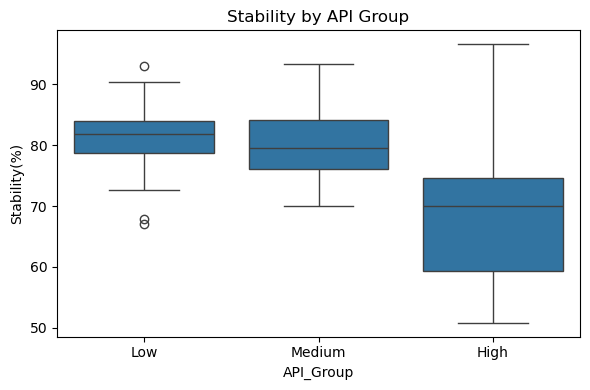

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))

# Boxplot for Stability vs API group
sns.boxplot(x="API_Group", y="Stability(%)", data=df_clean, order = ["Low", "Medium", "High"])
plt.title("Stability by API Group")

plt.tight_layout()
plt.show()


## <span style="color:red">Text Answers:</span>

Question 3: The distributions are all normal(ish) which means they can be assessed with parameteric tests, and are suitable for use in machine learning algorithms without log transformations. (There is a slight skew on the stability histogram which could be noted)

Question 4: A higher API percentage seems to be correlated with a reduced dissolution rate, but has no impact on bioavaiability. There is however a strong correlation between the amount of API and the stability of the formulations, with more API leading to a less stable product.

## Section 3: Statistical tests

Tasks: 
- Perform an ANOVA to compare the Stability between the API groups (low, medium, and high)
- Calculate a p-value for the correlation between the Stability and Binder percentages, and the Dissolution Rate and Active Ingredient percentages

Questions (explain your answers):

5. Are any statistical differences in the stability between the API groups? Explain your answer and working. (10% of marks)
6. Are any observed correlations between the Active Ingredient percentages and Bioavailability/Dissolution rate significant? Explain your answer and working. (10% of marks)

## <span style="color:red">Answers:</span>

In [21]:
from scipy.stats import f_oneway

# Group the data by API group
low_api = df_clean[df_clean["API_Group"] == "Low"]["Stability(%)"]
medium_api = df_clean[df_clean["API_Group"] == "Medium"]["Stability(%)"]
high_api = df_clean[df_clean["API_Group"] == "High"]["Stability(%)"]

# Perform ANOVA
f_stat, p_val = f_oneway(low_api, medium_api, high_api)

# Display ANOVA results
print("\nANOVA for Dissolution Rate:")
print("F-Statistic:", f_stat, "P-value:", p_val)



ANOVA for Dissolution Rate:
F-Statistic: 44.04466648657595 P-value: 1.028499794131313e-15


In [22]:
# Perform Tukey's HSD test on Stability
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_stability = pairwise_tukeyhsd(df_clean["Stability(%)"], df_clean["API_Group"])
print("\nTukey's HSD Test for Stability:\n", tukey_stability)


Tukey's HSD Test for Stability:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  12.9671    0.0  9.3454 16.5889   True
  High Medium  11.8099    0.0  8.3705 15.2493   True
   Low Medium  -1.1573 0.6826 -4.4433  2.1287  False
----------------------------------------------------


In [24]:
# The plots dont look significant but we should calculate p-values to make sure
from scipy import stats

print("Stability:Binder correlation", stats.pearsonr(df_clean["ActiveIngredient(%)"], df_clean["DissolutionRate(%)"]))

print("Dissolution Rate:Active Ingredient correlation:", stats.pearsonr(df_clean["ActiveIngredient(%)"], df_clean["Bioavailability"]))

Stability:Binder correlation PearsonRResult(statistic=-0.30790235568081475, pvalue=0.00012658027230497634)
Dissolution Rate:Active Ingredient correlation: PearsonRResult(statistic=0.05325698177717329, pvalue=0.5174602846712265)


## <span style="color:red">Text Answers:</span>

Question 5: Performing a one way ANOVA to the stability grouped by low, medium, and high API levels shows a significant difference, and when the Tukey post-hoc test is applied, this is found to be between the High and Low, and High and Medium groups, indicating that the stability is significantly affected by the high (>30%) inclusion of an API only.

Question 6: API percentage correlates significantly negatively with Dissolution Rate - indicating that more API results in a reduction in dissolution. There is no significant different in bioavailability however, so the bioavailability of the API is not related to how much is in the formulation.

## Section 4: Unsupervised Learning 

Tasks: 
- Perform PCA on the numeric columns from the dataframe
- Plot the PCA with the treatment groups coloured differently
- Perform clustering analysis on the same column
- Plot the results of the clustering analysis on the PCA 

Questions:

7. What does the PCA show? (10% of marks)
8. How does your clustering analysis compare to the API groups? (10% of marks)

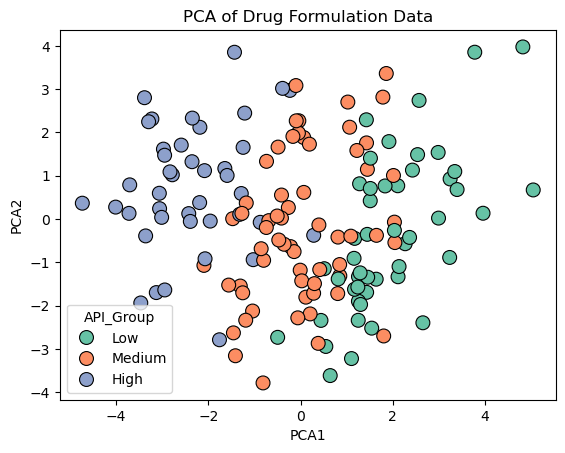

In [160]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_numeric = df_clean.select_dtypes("number")

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Add PCA components to DataFrame
df_clean["PCA1"] = pca_result[:, 0]
df_clean["PCA2"] = pca_result[:, 1]

# Plot PCA
sns.scatterplot(x="PCA1", y="PCA2", data=df_clean, hue = "API_Group", palette = "Set2"
                , hue_order = ["Low", "Medium", "High"], s = 100, edgecolor = "k")
plt.title("PCA of Drug Formulation Data")
plt.show()

/Users/davidshorthouse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


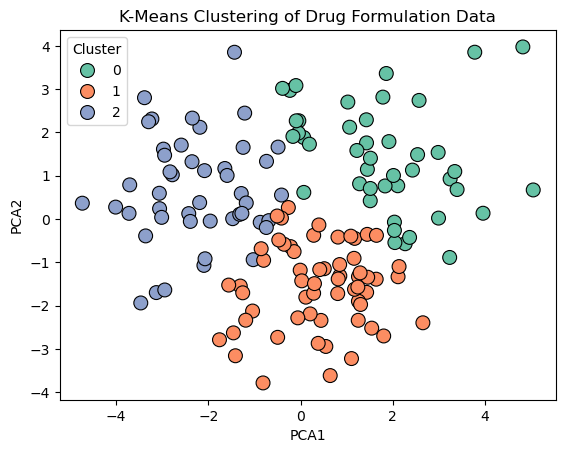

In [165]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(df_scaled)

# Plot clustering results
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data = df_clean, palette="Set2",
                 s = 100, edgecolor = "k")
plt.title("K-Means Clustering of Drug Formulation Data")
plt.show()

## <span style="color:red">Text Answers:</span>

Question 7: PCA shows not much in terms of obvious clustering, but overlaying the API group annotations shows that the first principal component correlates strongly with this grouping, and is likely using the API percentage as the main feature.

Question 8: Clustering through k-means with a n of 3 shows a similar grouping to the API, with the clusters strongly overlapping (though not perfectly)

## Section 5: Summary

Question 9: Having performed your analysis of the data, you should now have a reasonable idea of the findings, limitations, and overall conclusions. Write a short (~5 sentance) summary of the results of the study, including statistical findings, and what this means for the formulations being tested - in particular, what key findings would you present to colleagues who are trying to optimise the formulation? (20% of the marks)

## <span style="color:red">Text Answers:</span>

Question 9

In this study - drug formulations were compared for their stability, dissolution rate, and bioavailbility. Formulation parameters for the tablets are provided, including a low/medium/high binning of the API proportion. The dissolution rate of the tablets was found to be highly correlated with the amount of API in the formulation, and tablets with a high API proportion (>30%) were found to be significantly less stable than tablets with less API. 

Ths suggests that increasing the API percentage negatively effects the stability and dissolution rate of the tablets, with API >30% being highly detrimental to stability. I would conclude that API percentage should be kept below 30%, and within the 0-30% range, increased API will result in a faster dissolution, but no change in bioavailability.